# Metin Görselleştirme


In [91]:
import nltk
import pandas as pd
from textblob import Word
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")

In [92]:
df = pd.read_csv("veriseti2.csv", encoding='cp1254', header=None, names=["Name", "Brand", "Comment","Rate", "Price"])
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,Ürün çok hızlı ve özenli paketlenmiş bir şekil...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,çok sağlam şekilde paketlenmiş olarak geldi ga...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,Kardeşime Satın Aldım Gayet Güzel ve Kullanışl...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi ve telefonla aradım kaya bey ...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı çok güzel çok...,5.0,7.499


In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4771 entries, 0 to 4770
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     4771 non-null   object 
 1   Brand    4770 non-null   object 
 2   Comment  4770 non-null   object 
 3   Rate     4748 non-null   float64
 4   Price    4771 non-null   float64
dtypes: float64(2), object(3)
memory usage: 186.5+ KB


# Ön İşlemler


# 1. Büyük/Küçük Harf Dönüşümü


In [94]:
df["Comment"].fillna("", inplace=True)
df["Comment"] = df["Comment"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün çok hızlı ve özenli paketlenmiş bir şekil...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,çok sağlam şekilde paketlenmiş olarak geldi ga...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kardeşime satın aldım gayet güzel ve kullanışl...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi ve telefonla aradım kaya bey ...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı çok güzel çok...,5.0,7.499


# 2. Noktalama İşaretlerinin Kaldırılması


In [95]:
df["Comment"] = df["Comment"].str.replace("[^\w\s]", "")
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün çok hızlı ve özenli paketlenmiş bir şekil...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,çok sağlam şekilde paketlenmiş olarak geldi ga...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kardeşime satın aldım gayet güzel ve kullanışl...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi ve telefonla aradım kaya bey ...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı çok güzel çok...,5.0,7.499


# 3. Sayıların Kaldırılması


In [96]:
df["Comment"] = df["Comment"].str.replace("\d", "")
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün çok hızlı ve özenli paketlenmiş bir şekil...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,çok sağlam şekilde paketlenmiş olarak geldi ga...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kardeşime satın aldım gayet güzel ve kullanışl...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi ve telefonla aradım kaya bey ...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı çok güzel çok...,5.0,7.499


# 4. Stopwords Kaldırılması


In [97]:
nltk.download("stopwords", quiet=True)


True

In [99]:
sw = stopwords.words("turkish")
df["Comment"] = df["Comment"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hızlı özenli paketlenmiş bir şekilde elim...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,sağlam şekilde paketlenmiş olarak geldi gayet ...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kardeşime satın aldım gayet güzel kullanışlı a...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi telefonla aradım kaya bey bir...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı güzel beğendi...,5.0,7.499


# 5. Seyrek İfadelerin Silinmesi


In [111]:
sil = pd.Series(" ".join(df["Comment"]).split()).value_counts()[-100:]
df["Comment"] = df["Comment"].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hızlı özenli paketlenmiş bir şekilde elim...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,sağlam şekilde paketlenmiş olarak geldi gayet ...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kardeşime satın aldım gayet güzel kullanışlı a...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi telefonla aradım kaya bey bir...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı güzel beğendi...,5.0,7.499


# 6. Lemmatize


In [112]:
nltk.download("wordnet", quiet=True)


True

In [113]:
df["Comment"] = df["Comment"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,Name,Brand,Comment,Rate,Price
0,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hızlı özenli paketlenmiş bir şekilde elim...,5.0,7.499
1,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,sağlam şekilde paketlenmiş olarak geldi gayet ...,5.0,7.499
2,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kardeşime satın aldım gayet güzel kullanışlı a...,5.0,7.499
3,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün hemen geldi telefonla aradım kaya bey bir...,5.0,7.499
4,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,ürün iki gün içimde elime ulaştı güzel beğendi...,5.0,7.499


In [114]:
tf1 = (df["Comment"]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ["Words","TF"]
tf1.head()

,Words,TF
0,ürün,1468.0
1,hızlı,655.0
2,özenli,57.0
3,paketlenmiş,86.0
4,bir,1786.0


In [115]:
tf1.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Words   10155 non-null  object 
 1   TF      10155 non-null  float64
dtypes: float64(1), object(1)
memory usage: 158.8+ KB


In [116]:
tf1.nunique()


Words    10155
TF         161
dtype: int64

# 7. 300'den fazla geçen kelimeleri görselleştirelim.


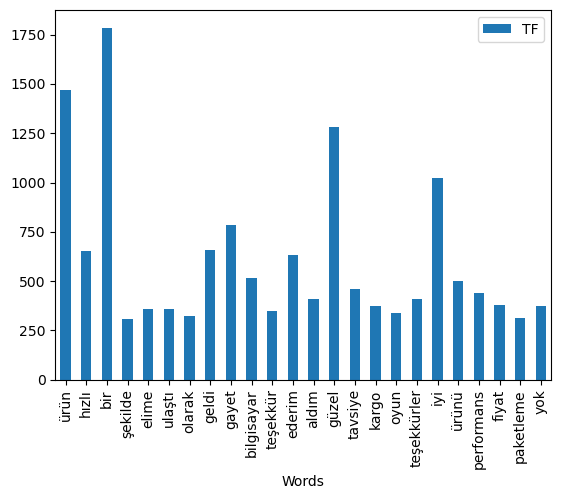

In [125]:
x = tf1[tf1["TF"] > 300]
x.plot.bar(x = "Words", y = "TF");
plt.savefig('tf1.png')
